# PREDICTING THE STOCK MARKET USING THE LSTM MODEL: FACEBOOK STOCKS
In this notebook we will be looking at data from the stock market, particularly the stocks from facebook, the latest dataset from 2012-2020. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

In [28]:
#importing the panda library
import pandas as pd
from pandas import DataFrame

In [29]:
#read the dataset
data = pd.read_csv('C:/Users/Katlego/FACEBOOK/archive/FB.csv',parse_dates=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2071,2020-08-12,258.970001,263.899994,258.109985,259.890015,259.890015,21428300
2072,2020-08-13,261.549988,265.160004,259.570007,261.299988,261.299988,17374000
2073,2020-08-14,262.309998,262.649994,258.679993,261.239990,261.239990,14792700
2074,2020-08-17,262.500000,264.100006,259.399994,261.160004,261.160004,13351100


In [30]:
#checking applicable values and not applicable values
data.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [31]:
#printing out the basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2076 non-null   object 
 1   Open       2076 non-null   float64
 2   High       2076 non-null   float64
 3   Low        2076 non-null   float64
 4   Close      2076 non-null   float64
 5   Adj Close  2076 non-null   float64
 6   Volume     2076 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 113.7+ KB


In [32]:
#import library matplotlib to visualise the data
import matplotlib.pyplot as plt

Text(0, 0.5, 'Facebook Stock Price')

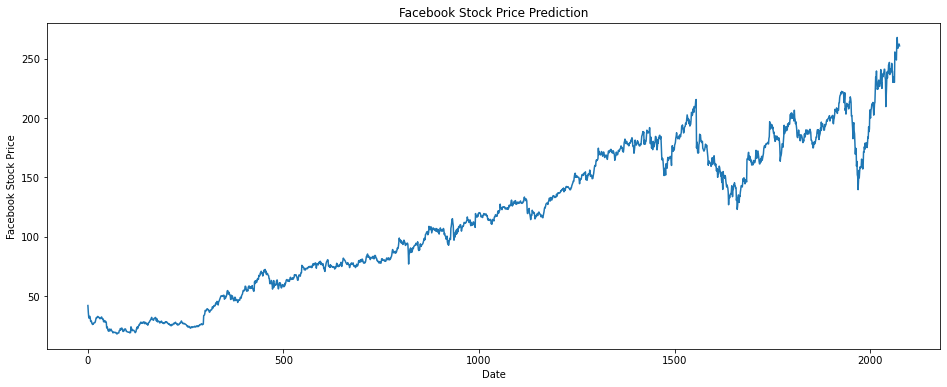

In [33]:
#checking the growth of the price and stock from 2012 to 2020
data['Open'].plot(figsize=(16,6))
plt.title('Facebook Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Facebook Stock Price')

In [34]:
#creating the training set of the data so if the date is less than 2020-01-02 then copy the data
data_training = data[data['Date']<'2020-01-02'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
1912,2019-12-24,206.300003,206.789993,205.000000,205.119995,205.119995,6046300
1913,2019-12-26,205.570007,207.820007,205.309998,207.789993,207.789993,9350700
1914,2019-12-27,208.669998,208.929993,206.589996,208.100006,208.100006,10284200
1915,2019-12-30,207.860001,207.899994,203.899994,204.410004,204.410004,10524300


In [35]:
#we want the 5 columns which we are going to include in the prediction hence we drop the 'Date' and 'Adj close'
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,42.049999,45.000000,38.000000,38.230000,573576400
1,36.529999,36.660000,33.000000,34.029999,168192700
2,32.610001,33.590000,30.940001,31.000000,101786600
3,31.370001,32.500000,31.360001,32.000000,73600000
4,32.950001,33.209999,31.770000,33.029999,50237200


# FEATURE SCALING

We will be importing the MinMaxScaler from scikit-learn which is a machine learning library. Feature range will be range from 0 to 1

In [36]:
#importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

In [37]:
#Feature scaling
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.12128111, 0.13341652, 0.10395486, 0.10261801, 1.        ],
       [0.09335154, 0.09178937, 0.07853803, 0.08159383, 0.28587298],
       [0.07351751, 0.07646619, 0.0680663 , 0.06642639, 0.16889149],
       ...,
       [0.96432907, 0.95163463, 0.9609597 , 0.95294592, 0.00770016],
       [0.96023072, 0.94649363, 0.94728543, 0.93447467, 0.00812313],
       [0.94070026, 0.93481409, 0.94576048, 0.93867948, 0.00535599]])

In [38]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i, 0])

In [39]:
training_data.shape[0]

1917

In [40]:
#importing library numpy for mathematical functions and operations to the arrays
import numpy as np

In [41]:
# Reshaping the data
X_train, y_train = np.array(X_train), np.array(y_train)

In [42]:
X_train.shape,y_train.shape

((1857, 60, 5), (1857,))

# BUILDING THE RECURRENT NEURAL NETWORK MODEL

This is the first step towards building the RNN.Keras libraries will be imported and its packages.

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [44]:
#Initiating the RNN
regressor = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

#Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

#Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

#Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 120,activation = 'relu'))
regressor.add(Dropout(0.5))

# Adding the output layer
regressor.add(Dense(units = 1))

In [45]:
#Get the summary of the model. It shows that we have 179,561 parameters in the regressor model.
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [46]:
#compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#fitting the RNN to the training set
regressor.fit(X_train, y_train, epochs =100, batch_size = 32)

Epoch 1/10
121/186 [==================>...........] - ETA: 29s - loss: 0.0319

# PREPARING THE DATASET
We now have to test and predict the facebook stock price and we have to prepare our test data

In [23]:
#creating the test set just like the training set, if the date is greater than or equals to then copy
data_test = data[data['Date']>='2016-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
911,2016-01-04,101.949997,102.239998,99.750000,102.220001,102.220001,37912400
912,2016-01-05,102.889999,103.709999,101.669998,102.730003,102.730003,23258200
913,2016-01-06,101.129997,103.769997,100.900002,102.970001,102.970001,25096200
914,2016-01-07,100.500000,101.430000,97.300003,97.919998,97.919998,45172900
915,2016-01-08,99.879997,100.500000,97.029999,97.330002,97.330002,35402300
...,...,...,...,...,...,...,...
2071,2020-08-12,258.970001,263.899994,258.109985,259.890015,259.890015,21428300
2072,2020-08-13,261.549988,265.160004,259.570007,261.299988,261.299988,17374000
2073,2020-08-14,262.309998,262.649994,258.679993,261.239990,261.239990,14792700
2074,2020-08-17,262.500000,264.100006,259.399994,261.160004,261.160004,13351100


In [24]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
911,2016-01-04,101.949997,102.239998,99.750000,102.220001,102.220001,37912400
912,2016-01-05,102.889999,103.709999,101.669998,102.730003,102.730003,23258200
913,2016-01-06,101.129997,103.769997,100.900002,102.970001,102.970001,25096200
914,2016-01-07,100.500000,101.430000,97.300003,97.919998,97.919998,45172900
915,2016-01-08,99.879997,100.500000,97.029999,97.330002,97.330002,35402300


In [25]:
data_training.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
1857,2019-10-07,180.000000,181.179993,178.089996,179.679993,179.679993,9178300
1858,2019-10-08,178.259995,180.369995,177.720001,177.750000,177.750000,9466900
1859,2019-10-09,179.160004,180.720001,177.940002,179.850006,179.850006,7556900
1860,2019-10-10,180.320007,181.610001,179.169998,180.029999,180.029999,8605000
1861,2019-10-11,182.149994,186.490005,182.139999,184.190002,184.190002,14930500
1862,2019-10-14,184.199997,184.619995,182.570007,183.279999,183.279999,7006000
1863,2019-10-15,183.800003,190.380005,183.660004,188.889999,188.889999,15039100
1864,2019-10-16,188.320007,189.699997,186.899994,189.550003,189.550003,10516900
1865,2019-10-17,190.300003,190.839996,188.770004,190.389999,190.389999,9603000
1866,2019-10-18,190.229996,191.490005,183.919998,185.850006,185.850006,16874200


In [26]:
#get the previous 60 days price
past_60_days = data_training.tail(60)

In [27]:
#append the data into the test set and we can be able to predict the stock price.
#drop the date and adj close and be left with the 5 columns needed for prediction
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,180.000000,181.179993,178.089996,179.679993,9178300
1,178.259995,180.369995,177.720001,177.750000,9466900
2,179.160004,180.720001,177.940002,179.850006,7556900
3,180.320007,181.610001,179.169998,180.029999,8605000
4,182.149994,186.490005,182.139999,184.190002,14930500


In [28]:
#scale values from 0 to 1 but that has already been done during the data training
inputs = scaler.transform(df)
inputs

array([[0.81926735, 0.81312701, 0.81608374, 0.81068225, 0.005752  ],
       [0.81046344, 0.8090841 , 0.81420292, 0.80102117, 0.0062604 ],
       [0.81501722, 0.81083107, 0.81532126, 0.81153329, 0.00289573],
       ...,
       [1.23573162, 1.21976541, 1.22575228, 1.21895174, 0.01564237],
       [1.23669297, 1.22700281, 1.22941231, 1.21855135, 0.01310284],
       [1.22885049, 1.23224357, 1.22870072, 1.22445811, 0.02248586]])

In [30]:
#prepare the test set just like how we prepared it at the training set.
X_test = []
y_test = []

#append the x and y test
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [31]:
#get the shape of the x and y test
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape,y_test.shape

((1165, 60, 5), (1165,))

In [32]:
y_pred = regressor.predict(X_test)

In [33]:
#we going to bring the values to a normal scale
scaler.scale_

array([5.05970449e-03, 4.99126541e-03, 5.08336709e-03, 5.00575662e-03,
       1.76160763e-09])

In [34]:
#
scale = 1/5.05970449e-03
scale

197.6400009084325

In [35]:
#multiplying the y_pred and y_test with the scale to bring the values to a normal scale
y_pred = y_pred*scale
y_test = y_test*scale

In [36]:
#now we get the normal scales
y_test

array([ 83.86999696,  84.80999896,  83.04999696, ..., 244.22999789,
       244.41999989, 242.87001189])

# VISUALIZATION

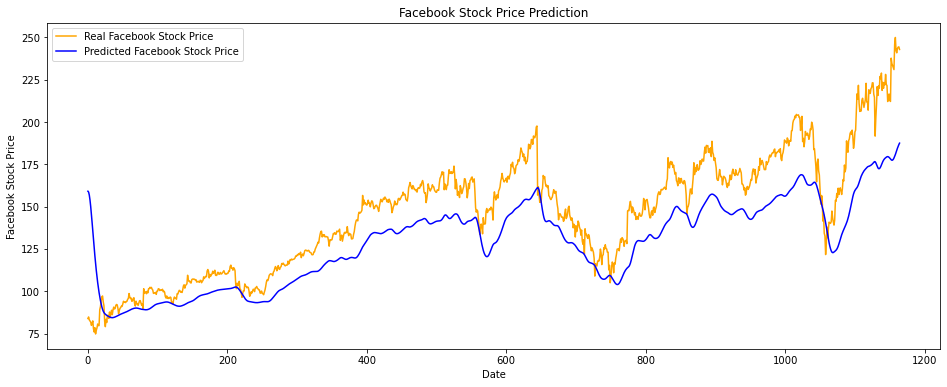

In [46]:
#visulising the output
plt.figure(figsize=(16,6))
plt.plot(y_test, color = 'orange', label = 'Real Facebook Stock Price')
plt.plot(y_pred, color ='blue', label = 'Predicted Facebook Stock Price')
plt.title('Facebook Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Facebook Stock Price')
plt.legend()
plt.show()